In [1]:
%pylab inline

import geomalgo as ga

Populating the interactive namespace from numpy and matplotlib


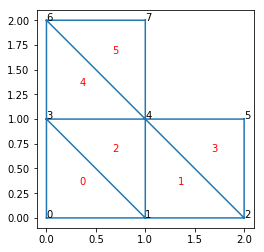

In [2]:
x = array([0, 1, 2, 0, 1, 2, 0, 1], dtype='d')
y = array([0, 0, 0, 1, 1, 1, 2, 2], dtype='d')
trivtx = array([[0, 1, 3], [1, 2, 4], [1, 4, 3], [2, 5, 4],
                [3, 4, 6], [4, 7, 6]], dtype='int32')

def plot_with_indices():
    # Plot triangulation.
    triplot(x, y, trivtx)

    # Plot vertices indices.
    for ivert, (xvert, yvert) in enumerate(zip(x, y)):
        text(xvert, yvert, ivert)

    # Plot triangle indices.
    for itri, (v0, v1, v2) in enumerate(trivtx):
        xcenter = (x[v0] + x[v1] + x[v2]) / 3.
        ycenter = (y[v0] + y[v1] + y[v2]) / 3.
        text(xcenter, ycenter, itri, color='red')

    axis('scaled')
    show()
    
plot_with_indices()

In [3]:
print(trivtx[2])

[1 4 3]


In [4]:
TG = ga.Triangulation2D(x, y, trivtx)              

In [5]:
%load_ext Cython
%load_ext wurlitzer

In [6]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

def get_triangle(ga.Triangulation2D TG, int T):
    cdef:
        int IA, IB, V2
        ga.CPoint2D A, B, C

    T = 2

    IA = TG.trivtx[T, 0]
    IB = TG.trivtx[T, 1]
    IC = TG.trivtx[T, 2]

    A.x = TG.x[IA]
    A.y = TG.y[IA]
    
    B.x = TG.x[IB]
    B.y = TG.y[IB]
    
    C.x = TG.x[IC]
    C.y = TG.y[IC]
    
    printf("%d: A(%.0f,%.0f), B(%.0f,%.0f), C(%.0f,%.0f)\n",
           T, A.x, A.y, B.x, B.y, C.x, C.y)

In [7]:
get_triangle(TG, 2)

2: A(1,0), B(1,1), C(0,1)


In [8]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

def iter_triangles(ga.Triangulation2D TG):
    cdef:
        int T
        ga.CTriangle2D ABC
        ga.CPoint2D A, B, C

    ga.triangle2d_set(&ABC, &A, &B, &C)

    for T in range(TG.NT):
        TG.get(T, &ABC)
        printf("%d: A(%.0f,%.0f), B(%.0f,%.0f), C(%.0f,%.0f)\n",
               T, A.x, A.y, B.x, B.y, C.x, C.y)

In [9]:
iter_triangles(TG)

0: A(0,0), B(1,0), C(0,1)
1: A(1,0), B(2,0), C(1,1)
2: A(1,0), B(1,1), C(0,1)
3: A(2,0), B(2,1), C(1,1)
4: A(0,1), B(1,1), C(0,2)
5: A(1,1), B(1,2), C(0,2)


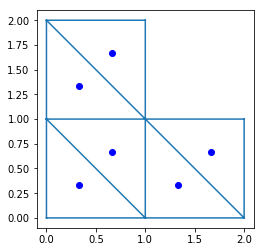

In [10]:
triplot(x, y, trivtx)

xcenter, ycenter = ga.triangulation.compute_centers(TG)

plot(xcenter, ycenter, 'bo')

axis('scaled')
show()

In [11]:
intern_edges, boundary_edges, edge_map = ga.build_edges(TG.trivtx, TG.NV)

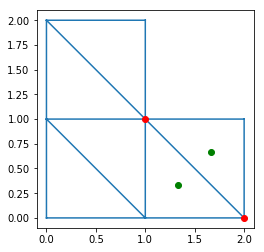

In [12]:
triplot(x, y, trivtx)
I = 2

IA = intern_edges.vertices[I, 0]
IB = intern_edges.vertices[I, 1]
plot([x[IA], x[IB]],
     [y[IA], y[IB]], 'ro')

T0 = intern_edges.triangles[I, 0]
T1 = intern_edges.triangles[I, 1]
plot([xcenter[T0], xcenter[T1]],
     [ycenter[T0], ycenter[T1]], 'go')

axis('scaled')
show()

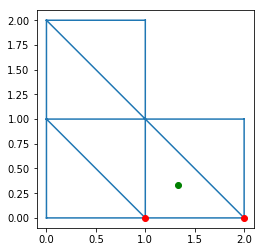

In [13]:
triplot(x, y, trivtx)
I = 2

IA = boundary_edges.vertices[I, 0]
IB = boundary_edges.vertices[I, 1]
plot([x[IA], x[IB]],
     [y[IA], y[IB]], 'ro')

T = boundary_edges.triangle[I]
plot(xcenter[T], ycenter[T], 'go')

axis('scaled')
show()

In [14]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

def find_edge(ga.EdgeMap edge_map, int IA, int IB):
    cdef:
        bint found
        int E, I
        
    E = edge_map.search_edge_idx(IA, IB, &found)
    
    if not found:
        printf("No such edge: (%d,%d)\n", IA, IB)
        return
        
    I = edge_map.idx[E]
        
    if edge_map.location[E] == ga.INTERN_EDGE:
        printf("Intern edge for (%d,%d): %d\n", IA, IB, I)
    else:
        printf("Boudnary edge for (%d,%d): %d\n", IA, IB, I)

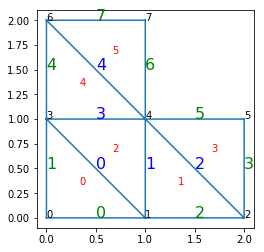

Intern edge for (1,4): 1
Boudnary edge for (7,6): 7
No such edge: (7,5)


In [15]:
def text_middle(IA, IB, color):
    A = ga.Point2D(x[IA], y[IA])
    B = ga.Point2D(x[IB], y[IB])
    AB = ga.Segment2D(A, B)
    M = AB.compute_middle()
    text(M.x, M.y, I, color=color, size=16)

for I in range(boundary_edges.size):
    IA, IB = boundary_edges.vertices[I]
    text_middle(IA, IB, 'green')
    
for I in range(intern_edges.size):
    IA, IB = intern_edges.vertices[I]
    text_middle(IA, IB, 'blue')

plot_with_indices()

find_edge(edge_map, 1, 4)
find_edge(edge_map, 7, 6)
find_edge(edge_map, 7, 5)